In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn import preprocessing
from sklearn.cluster import KMeans


In [3]:
#Task 1

In [4]:
#Getting the data

data = pd.read_csv('subscription_clv_data.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Subscription_Length      1000 non-null   int64  
 1   Monthly_Spend            1000 non-null   float64
 2   Total_Orders             1000 non-null   int64  
 3   Customer_Age             1000 non-null   int64  
 4   Gender                   1000 non-null   object 
 5   Region                   1000 non-null   object 
 6   Payment_Type             1000 non-null   object 
 7   Referral_Source          1000 non-null   object 
 8   Discount_Applied         1000 non-null   object 
 9   Engagement_Score         1000 non-null   int64  
 10  Customer_Lifetime_Value  1000 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 86.1+ KB


,Subscription_Length,Monthly_Spend,Total_Orders,Customer_Age,Gender,Region,Payment_Type,Referral_Source,Discount_Applied,Engagement_Score,Customer_Lifetime_Value
0,29,33.93,35,30,Female,Europe,Credit Card,Google Ads,No,80,2575.42
1,15,31.67,21,24,Male,North America,Credit Card,Friends & Family,No,90,1690.24
2,8,35.34,11,53,Male,North America,Other,Friends & Family,Yes,33,790.72
3,21,20.32,23,64,Female,Europe,PayPal,Friends & Family,Yes,31,1467.92
4,19,15.57,26,68,Male,North America,Credit Card,Google Ads,No,47,1171.04


In [5]:
#Checking the distribution of CLV in dataframe
CLV = data[['Customer_Lifetime_Value']].agg(['mean', 'max', 'min', 'median', 'std'])
CLV


,Customer_Lifetime_Value
mean,1546.814260
max,4657.520000
min,112.450000
median,1320.470000
std,943.352904


<Axes: xlabel='Customer_Lifetime_Value', ylabel='Count'>

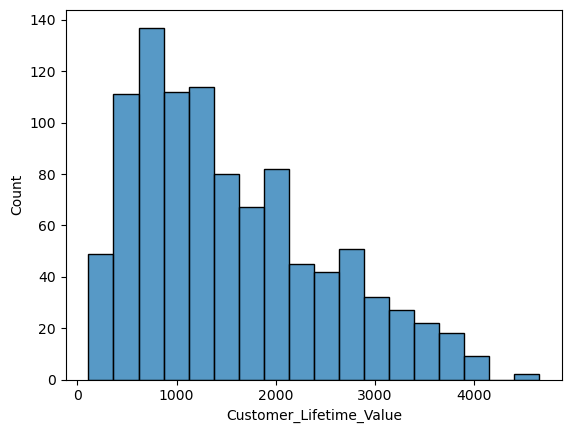

In [6]:
#Plotting the distribution of CLV
sns.histplot(data['Customer_Lifetime_Value'])

In [7]:
#Checking the distribution of subscription length and total orders in dataframe
subscription_and_total_orders = data[['Subscription_Length', 'Total_Orders']].agg(['mean', 'max', 'min', 'median', 'std'])
subscription_and_total_orders

,Subscription_Length,Total_Orders
mean,18.398000,22.789000
max,35.000000,44.000000
min,1.000000,1.000000
median,19.000000,23.000000
std,10.389588,10.678319


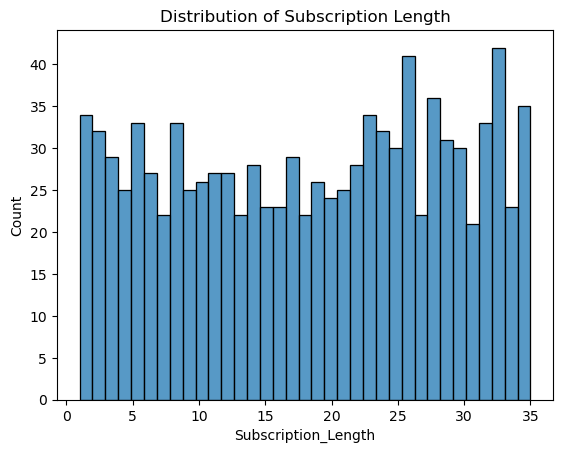

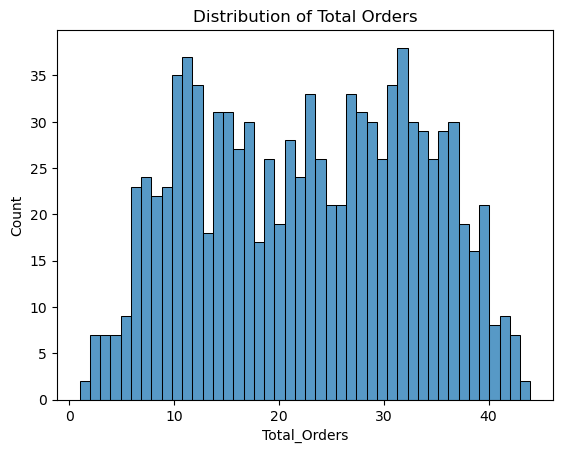

In [8]:
#Plotting the distribution of values in subscription length and total orders

#Using histogram to see distribution of subscription length
sns.histplot(data['Subscription_Length'], bins = 35)
plt.title("Distribution of Subscription Length")
plt.show()

#Using histogram to see distribution of total orders
sns.histplot(data['Total_Orders'], bins = 44)
plt.title("Distribution of Total Orders")
plt.show()

#We can see that the distribution of values is stable throughout, and subscription lengths of 26 and 33 have the most values.
#For total orders, we can see a rapid rise when total orders exceed 6 and are not higher than 40. 


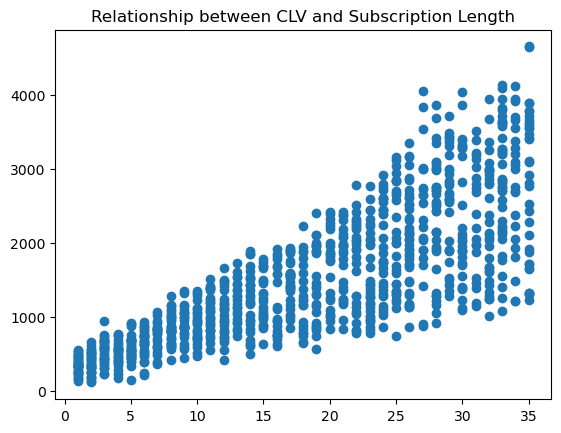

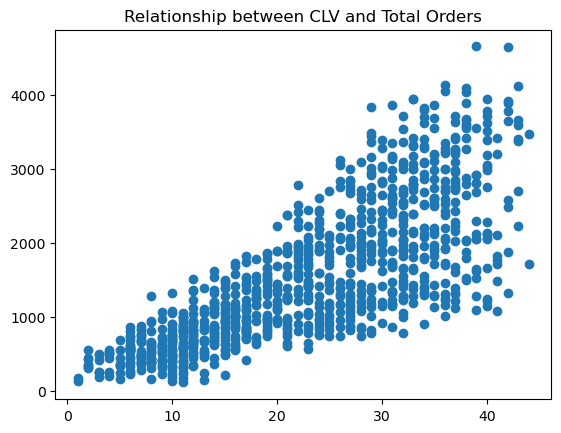

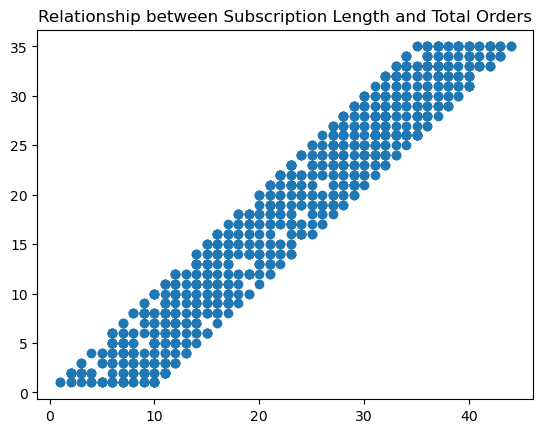

In [9]:
#Scatter plots to explore relationships between CLV, subscription length and total orders

#Scatter plot between subscription length and CLV
plt.scatter(x = data['Subscription_Length'], y = data['Customer_Lifetime_Value'])
plt.title('Relationship between CLV and Subscription Length')
plt.show()

#Scatter plot between total orders and CLV
plt.scatter(x = data['Total_Orders'], y = data['Customer_Lifetime_Value'])
plt.title('Relationship between CLV and Total Orders')
plt.show()

#Scatter plot between subscription length and total orders
plt.scatter(x = data['Total_Orders'], y = data['Subscription_Length'])
plt.title('Relationship between Subscription Length and Total Orders')
plt.show()

#We can see that the relationship is largely distributed for higher CLV and total order and for higher CLV and subscription length.


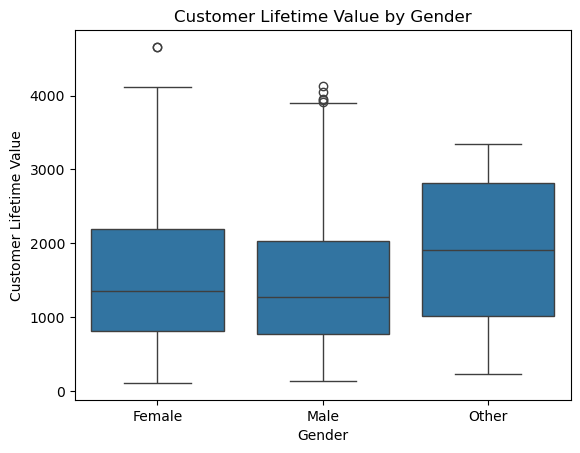

In [10]:
#Box plot to compare CLV across different gender categories

sns.boxplot(x=data['Gender'], y=data['Customer_Lifetime_Value'], data=data)

plt.title("Customer Lifetime Value by Gender")
plt.xlabel("Gender")
plt.ylabel("Customer Lifetime Value")
plt.show()

#We can see the distribution in customer lifetime value by gender, and notice that the distribution is larger for female vs male, and that male have more outliers.
#For other gender, the median is higher.

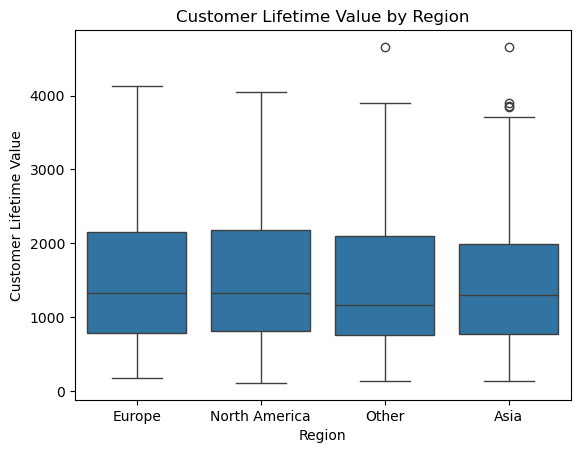

In [11]:
#Box plot to compare regional differences for CLV

sns.boxplot(x = data['Region'], y = data['Customer_Lifetime_Value'], data = data)

plt.title('Customer Lifetime Value by Region')
plt.xlabel('Region')
plt.ylabel('Customer Lifetime Value')
plt.show()

#We can see that Asia has the most outliers, while Europe and North America have none. Europe has the largest value distribution, and slightly larger median than North America, other and Asia.


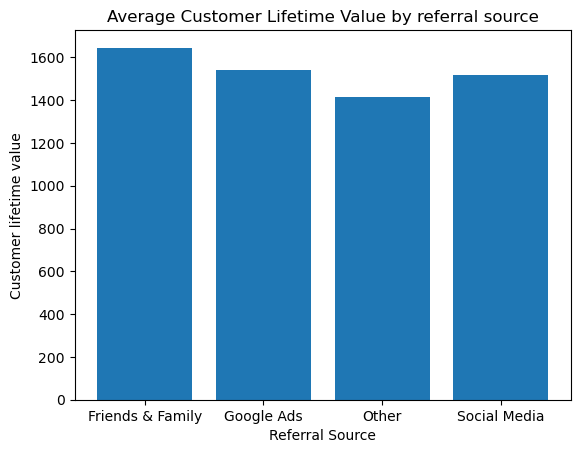

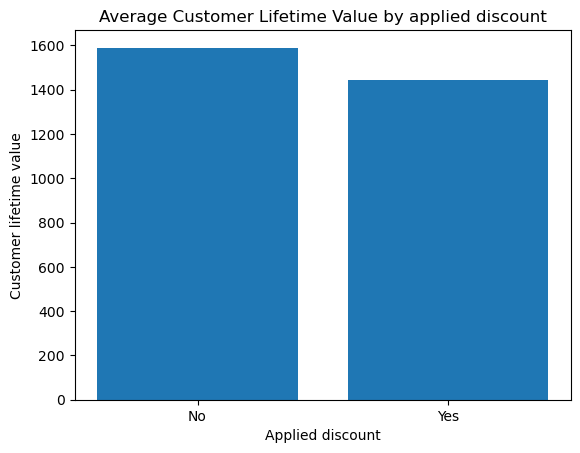

In [12]:
#Determining and visualizing the average of CLV for referral sources and applied discounts
#1st visualization of referral source and average customer lifetime value
avg_clv_by_referralsource = data.groupby(['Referral_Source'])['Customer_Lifetime_Value'].mean()

avg_clv_by_referralsource = avg_clv_by_referralsource.reset_index()

plt.bar(x = avg_clv_by_referralsource['Referral_Source'], height = avg_clv_by_referralsource['Customer_Lifetime_Value'])

plt.title('Average Customer Lifetime Value by referral source')
plt.xlabel('Referral Source')
plt.ylabel('Customer lifetime value')
plt.show()

#The 1st visualization tells us that friend & family have the highest potential for better average CLV, which isn't far above from the other referral methods.


#2nd visualization of applied discounts by average customer lifetime value

avg_clv_by_applied_discount = data.groupby(['Discount_Applied'])['Customer_Lifetime_Value'].mean()

avg_clv_by_applied_discount = avg_clv_by_applied_discount.reset_index()

plt.bar(x = avg_clv_by_applied_discount['Discount_Applied'], height = avg_clv_by_applied_discount['Customer_Lifetime_Value'])

plt.title('Average Customer Lifetime Value by applied discount')
plt.xlabel('Applied discount')
plt.ylabel('Customer lifetime value')
plt.show()

#The 2nd visualization tells an interesting story; the average CLV is expected to be higher when the discount hasn't been applied.


In [13]:
#Converting categorical columns with one-hot encoding using dummies
data = pd.get_dummies(data, columns=['Gender'], prefix='Gender', dtype=int)
data = pd.get_dummies(data, columns=['Region'], prefix='Region', dtype=int)
data = pd.get_dummies(data, columns=['Payment_Type'], prefix='Payment_Type', dtype=int)
data = pd.get_dummies(data, columns=['Referral_Source'], prefix='Referral_Source', dtype=int)
data = pd.get_dummies(data, columns=['Discount_Applied'], prefix='Discount_Applied', dtype=int)


In [14]:
#Scale numerical features (’Customer Age’, ’Subscription Length’, ’Total Orders’, ’Monthly Spend’, ’Engagement Score’) to ensure comparability.
from sklearn.preprocessing import StandardScaler

features_to_scale = ['Customer_Age', 'Subscription_Length', 'Total_Orders', 'Monthly_Spend', 'Engagement_Score']

scaler = StandardScaler()

data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

data.head()


,Subscription_Length,Monthly_Spend,Total_Orders,Customer_Age,Engagement_Score,Customer_Lifetime_Value,Gender_Female,Gender_Male,Gender_Other,Region_Asia,...,Region_Other,Payment_Type_Credit Card,Payment_Type_Other,Payment_Type_PayPal,Referral_Source_Friends & Family,Referral_Source_Google Ads,Referral_Source_Other,Referral_Source_Social Media,Discount_Applied_No,Discount_Applied_Yes
0,1.020955,0.238642,1.144104,-0.902492,1.025624,2575.42,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,-0.327222,0.054048,-0.167620,-1.297139,1.369955,1690.24,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,-1.001310,0.353808,-1.104565,0.610322,-0.592731,790.72,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
3,0.250568,-0.873002,0.019770,1.333841,-0.661597,1467.92,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4,0.057972,-1.260975,0.300853,1.596939,-0.110668,1171.04,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [15]:
#Splitting the dataset to 80 % training and 20 % test data with random_state = 0

#1 Setting the predictor and target values. Target value is CLV. 
predictors = data.drop('Customer_Lifetime_Value', axis = 1)
target = data['Customer_Lifetime_Value']

#2 Creating the training (80%) and test set (20%) with random state = 0

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

In [16]:
#Creating a linear regression model for predicting CLV based on other features in the data model
from sklearn.linear_model import LinearRegression

#1 Fitting the dataset to a linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#2 Predicting CLV based on the test set
prediction = lr_model.predict(X_test)

In [17]:
#Evaluating model's performance using R-squared metric
r2 = metrics.r2_score(y_test, prediction)

print('R_squared', r2)

#The r2 score of 0.909 indicates a strong fit for predicting actual values, and it captures the patterns of the data very well.

R_squared 0.9095357294232458


In [18]:
#Checking the coefficiency of each column
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr_model.coef_
})
print(coef_df)
#Based on the coefficiency of each column, we can see that the subscription length and monthly spend are the highest influencers on CLV.
#Additionally, total orders, engagement score and friend & family as a referral source have high influence also on CLV.


                             Feature  Coefficient
0                Subscription_Length   623.710733
1                      Monthly_Spend   470.229691
2                       Total_Orders    88.911602
3                       Customer_Age     8.584374
4                   Engagement_Score    86.716568
5                      Gender_Female   -17.445338
6                        Gender_Male   -19.636320
7                       Gender_Other    37.081658
8                        Region_Asia   -72.869570
9                      Region_Europe    42.160792
10              Region_North America    87.039568
11                      Region_Other   -56.330790
12          Payment_Type_Credit Card   -15.709672
13                Payment_Type_Other    14.801250
14               Payment_Type_PayPal     0.908422
15  Referral_Source_Friends & Family    99.722029
16        Referral_Source_Google Ads   -36.356924
17             Referral_Source_Other   -51.566422
18      Referral_Source_Social Media   -11.798683


In [19]:
#Questions:

#1 What insights can help increase customer lifetime value?

#We can see that the biggest contributors for higher CLV stem from subscription length and monthly spend.
    #Therefore, when moving forward, we should secure high subscription lengths and monthly spend by securing steady operations on these fields.

#We can also see regional differences in the CLV; North America and Europe have positive and high coefficiency, while Asia and other regions have largely negative coefficiency
    #To combat this issue, we should take regional action and implement more effort in these regions with negative coefficiency.


#2 Should the company continue offering discounts to new customers? Does it lead to higher CLV?

#The company shouldn't offer any discount to new customers, since the average CLV is higher for customer's without discount and the coefficiency of applied discount is negative in the model.
    #-This is explained by the bar chart of avg CLV and applied discount, which proves that avg CLV is slightly higher without discount vs with discount.
    #According to the coefficiency, the discount that is applied is -8.29, while for discount that hasn't been applied has 8.29 coefficiency.


#3 What engagement patterns are associated with higher spending and retention? (Couldn't quite understand this question)
    #The higher the engagement score, more likely the customer is willing to spend more and maintain own subscription status. 
    

In [20]:
#Task 2

In [21]:
#Getting the data
remote_work_data = pd.read_csv('remote_work_analysis_dataset.csv')
#Removing the work location columns
remote_work_data = remote_work_data.drop('Work_Location', axis = 1)
remote_work_data.head()

,Hours_Worked_Per_Week,Number_of_Virtual_Meetings_Per_Week,Stress_Level,Job_Satisfaction,Work_Life_Balance_Rating,Mental_Health_Condition,Productivity_Score
0,39,3,5,5,4,1,60
1,39,5,10,1,1,0,61
2,39,15,8,10,7,0,80
3,45,19,9,7,6,0,53
4,48,17,10,1,1,1,58


In [22]:
#Data preparation: checking the info of the data if there are nulls
remote_work_data.info()
remote_work_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Hours_Worked_Per_Week                1000 non-null   int64
 1   Number_of_Virtual_Meetings_Per_Week  1000 non-null   int64
 2   Stress_Level                         1000 non-null   int64
 3   Job_Satisfaction                     1000 non-null   int64
 4   Work_Life_Balance_Rating             1000 non-null   int64
 5   Mental_Health_Condition              1000 non-null   int64
 6   Productivity_Score                   1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


,Hours_Worked_Per_Week,Number_of_Virtual_Meetings_Per_Week,Stress_Level,Job_Satisfaction,Work_Life_Balance_Rating,Mental_Health_Condition,Productivity_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.495000,11.165000,6.340000,4.630000,5.583000,0.486000,66.235000
std,4.861235,6.731202,2.983169,3.043413,2.809805,0.500054,13.357702
min,30.000000,1.000000,1.000000,1.000000,1.000000,0.000000,50.000000
25%,36.000000,5.000000,4.000000,2.000000,3.000000,0.000000,56.000000
50%,39.000000,10.000000,7.000000,4.000000,6.000000,0.000000,60.000000
75%,43.000000,17.000000,9.000000,7.000000,8.000000,1.000000,82.000000
max,54.000000,28.000000,10.000000,10.000000,10.000000,1.000000,94.000000


In [23]:
#Data preparation: standardizing the data

remote_work_data_standardized = remote_work_data.apply(lambda x: preprocessing.scale(x))
remote_work_data_standardized.head()

,Hours_Worked_Per_Week,Number_of_Virtual_Meetings_Per_Week,Stress_Level,Job_Satisfaction,Work_Life_Balance_Rating,Mental_Health_Condition,Productivity_Score
0,-0.101877,-1.213615,-0.449411,0.121635,-0.563666,1.028403,-0.467005
1,-0.101877,-0.916342,1.227497,-1.193337,-1.631890,-0.972381,-0.392105
2,-0.101877,0.570020,0.556734,1.765349,0.504558,-0.972381,1.031007
3,1.132995,1.164565,0.892115,0.779121,0.148483,-0.972381,-0.991310
4,1.750431,0.867292,1.227497,-1.193337,-1.631890,1.028403,-0.616807


In [24]:
#Data preparation: iterating over k values
sse_clust = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(remote_work_data_standardized)
    sse_clust.append(kmeans.inertia_)



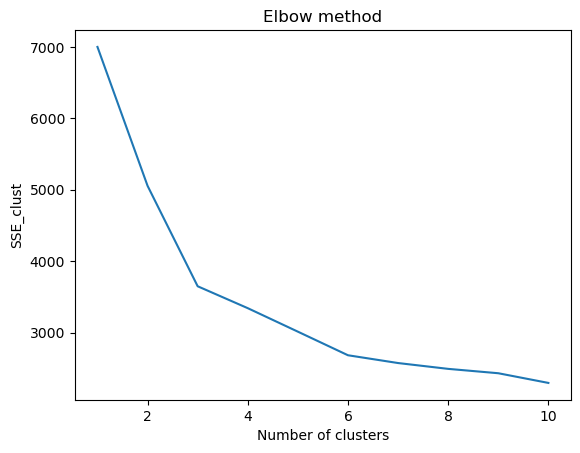

In [25]:
#Getting the optimal amount of clusters using the elbow method

plt.plot(range(1,11), sse_clust)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE_clust')

plt.show()
#The optimal number of clusters would be 3 in this case

In [26]:
#Performing Kmeans clustering with the optimal number of clusters (3)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)

y_clust = kmeans.fit_predict(remote_work_data_standardized)

In [27]:
#Average of each variable in a cluster
remote_work_data.groupby(y_clust).mean()

,Hours_Worked_Per_Week,Number_of_Virtual_Meetings_Per_Week,Stress_Level,Job_Satisfaction,Work_Life_Balance_Rating,Mental_Health_Condition,Productivity_Score
0,44.207831,19.280120,8.093373,2.783133,4.307229,0.572289,54.518072
1,39.483776,9.427729,3.746313,7.120944,7.120944,0.327434,83.929204
2,34.750760,4.765957,7.243161,3.927052,5.285714,0.562310,59.826748


In [28]:
#What variables seem to differ most from the employee segments?
#For the cluster 0, there are huge deviations between the avg number of virtual meetings per week and the avg stress level compared to other clusters
#For the cluster 1, large deviations can be seen in the avg job satisfaction and the avg productivity score compared to other clusters
#For the cluster 2, there aren't that big deviations between other avg values in other clusters. 

In [29]:
#Defining the cluster for 'at_risk' employees based on productivity, stress level and job satisfaction
#When looking at the avg values for stress level, job satisfaction and productivity, we see that cluster 0 matches greatly with the criteria for 'at risk' employees
remote_work_data['At_risk'] = np.where(y_clust == 0, 1, 0)
remote_work_data

#We can now see, that the cluster 0 contains all the employees at risk value of 1, while other clusters have risk value of 0.


,Hours_Worked_Per_Week,Number_of_Virtual_Meetings_Per_Week,Stress_Level,Job_Satisfaction,Work_Life_Balance_Rating,Mental_Health_Condition,Productivity_Score,At_risk
0,39,3,5,5,4,1,60,0
1,39,5,10,1,1,0,61,0
2,39,15,8,10,7,0,80,0
3,45,19,9,7,6,0,53,1
4,48,17,10,1,1,1,58,1
...,...,...,...,...,...,...,...,...
995,42,23,10,1,6,0,58,1
996,41,20,10,1,9,1,59,1
997,38,9,1,7,5,0,85,0
998,44,14,10,2,2,1,58,1


In [30]:
#Dividing the data to a training set (70%) and test set (30%) with random_state = 0

#Creating the target and predictor models

predictor = remote_work_data.drop('At_risk', axis = 1)
target2 = remote_work_data['At_risk']

#Creating the model with 70% training and 30% test set with random state = 0

X_train, X_test, y_train, y_test = train_test_split(predictor, target2, test_size = 0.3, random_state = 0)

In [31]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
#Predicting the test data
y_pred = model.predict(X_test)



In [33]:
#Generating a confusion matrix and classification performance measures

#Confusion matrix:

cm = confusion_matrix(y_test, y_pred)

#Classification report

classification_rpt = classification_report(y_test, y_pred)

#Accuracy score

accuracy = accuracy_score(y_test, y_pred)


print(cm)

print(classification_rpt)

print(accuracy)

[[204   0]
 [  0  96]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       204
           1       1.00      1.00      1.00        96

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

1.0


In [40]:
#The perfomance of the model seems to be absolutely perfect, which can raise some questions regarding the data and if the model is realistic.
#I have listed some reasons I could think of regarding this issue:
#1. I didn't standardize/scale the values before building the prediction model. 
#2. The one reason could be due to the fact that I already specified the risk level being 1 at the cluster 0 and 0 at the other clusters.
#3. The test set might be too similar to the training set, which makes the prediction being very accurate, or i've used the same dataset for both training and testing.
#4. The dataset might be inbalanced, contain some data leakage or just simple.
print(y_pred)
print(remote_work_data.corr()['At_risk'])
#When checking the correlations and the y_pred, we see that the correlation isn't 1 between at_risk and other values. Therefore, the issue can't be related to correlation.
#And the predictions give different values of 0 or 1. Therefore the issue can't be related to a prediction failure.



[1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0
 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1
 1 0 0 0]
Hours_Worked_Per_Week                  0.683807
Number_of_Virtual_Meetings_Per_Week    0.850355
Stress_Level                           0.414567
Job_Satisfaction                      -0.428029
Work_Life_Balance_Rating              -0.320254
Mental_Health_Condition                0.121713
Productivity_Score                    -0.618700
At_risk                                1.000000
Name: 

[1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0
 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1
 1 0 0 0]
